<a href="https://colab.research.google.com/github/srishtishaw59/121/blob/main/UPI_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#read csv file
df = pd.read_csv('sample_data/upi_data_enhanced.csv')
print(df)

      Month  No. of Banks live on UPI  Volume (in Mn)  Value (in Cr.)  \
0    Aug-25                       688        20008.31      2485472.91   
1    Jul-25                       684        19467.95      2508498.09   
2    Jun-25                       675        18395.01      2403930.69   
3    May-25                       673        18677.46      2514297.01   
4    Apr-25                       668        17893.42      2394925.87   
..      ...                       ...             ...             ...   
108  Aug-16                        21            0.09            3.09   
109  Jul-16                        21            0.09            0.38   
110  Jun-16                        21            0.00            0.00   
111  May-16                        21            0.00            0.00   
112  Apr-16                        21            0.00            0.00   

     Avg_Txn_Value_INR  MoM_Growth_Volume_%  MoM_Growth_Value_%  
0          1242.220312             2.775639           -0.

In [ ]:
#top  row of data
df.head(2)

,Month,No. of Banks live on UPI,Volume (in Mn),Value (in Cr.),Avg_Txn_Value_INR,MoM_Growth_Volume_%,MoM_Growth_Value_%
0,Aug-25,688,20008.31,2485472.91,1242.220312,2.775639,-0.917887
1,Jul-25,684,19467.95,2508498.09,1288.527087,5.832777,4.349851


In [ ]:
df.columns

Index(['Month', 'No. of Banks live on UPI', 'Volume (in Mn)', 'Value (in Cr.)',
       'Avg_Txn_Value_INR', 'MoM_Growth_Volume_%', 'MoM_Growth_Value_%'],
      dtype='object')

In [ ]:
#datatype overveiw
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     113 non-null    object 
 1   No. of Banks live on UPI  113 non-null    int64  
 2   Volume (in Mn)            113 non-null    float64
 3   Value (in Cr.)            113 non-null    float64
 4   Avg_Txn_Value_INR         110 non-null    float64
 5   MoM_Growth_Volume_%       110 non-null    float64
 6   MoM_Growth_Value_%        110 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 6.3+ KB


In [ ]:
#df.duplicated
df.duplicated().sum()


np.int64(0)

In [ ]:
#missing values
df.isnull().sum()

,0
Month,0
No. of Banks live on UPI,0
Volume (in Mn),0
Value (in Cr.),0
Avg_Txn_Value_INR,3
MoM_Growth_Volume_%,3
MoM_Growth_Value_%,3


In [ ]:
#check the shape of dataset
df.shape

(113, 7)

In [ ]:
df.nunique()

,0
Month,113
No. of Banks live on UPI,97
Volume (in Mn),109
Value (in Cr.),111
Avg_Txn_Value_INR,110
MoM_Growth_Volume_%,109
MoM_Growth_Value_%,110


In [ ]:
#drop the unique values from the data
df.drop_duplicates(inplace=True)


In [ ]:

df['Month'].unique()

array(['Aug-25', 'Jul-25', 'Jun-25', 'May-25', 'Apr-25', 'Mar-25',
       'Feb-25', 'Jan-25', 'Dec-24', 'Nov-24', 'Oct-24', 'Sep-24',
       'Aug-24', 'Jul-24', 'Jun-24', 'May-24', 'Apr-24', 'Mar-24',
       'Feb-24', 'Jan-24', 'Dec-23', 'Nov-23', 'Oct-23', 'Sep-23',
       'Aug-23', 'Jul-23', 'Jun-23', 'May-23', 'Apr-23', 'Mar-23',
       'Feb-23', 'Jan-23', 'Dec-22', 'Nov-22', 'Oct-22', 'Sep-22',
       'Aug-22', 'Jul-22', 'Jun-22', 'May-22', 'Apr-22', 'Mar-22',
       'Feb-22', 'Jan-22', 'Dec-21', 'Nov-21', 'Oct-21', 'Sep-21',
       'Aug-21', 'Jul-21', 'Jun-21', 'May-21', 'Apr-21', 'Mar-21',
       'Feb-21', 'Jan-21', 'Dec-20', 'Nov-20', 'Oct-20', 'Sep-20',
       'Aug-20', 'Jul-20', 'Jun-20', 'May-20', 'Apr-20', 'Mar-20',
       'Feb-20', 'Jan-20', 'Dec-19', 'Nov-19', 'Oct-19', 'Sep-19',
       'Aug-19', 'Jul-19', 'Jun-19', 'May-19', 'Apr-19', 'Mar-19',
       'Feb-19', 'Jan-19', 'Dec-18', 'Nov-18', 'Oct-18', 'Sep-18',
       'Aug-18', 'Jul-18', 'Jun-18', 'May-18', 'Apr-18', 'Mar-

In [ ]:
#sort the series or array or list
df['Month'].sort_values(ascending=True).unique()

array(['Apr-16', 'Apr-17', 'Apr-18', 'Apr-19', 'Apr-20', 'Apr-21',
       'Apr-22', 'Apr-23', 'Apr-24', 'Apr-25', 'Aug-16', 'Aug-17',
       'Aug-18', 'Aug-19', 'Aug-20', 'Aug-21', 'Aug-22', 'Aug-23',
       'Aug-24', 'Aug-25', 'Dec-16', 'Dec-17', 'Dec-18', 'Dec-19',
       'Dec-20', 'Dec-21', 'Dec-22', 'Dec-23', 'Dec-24', 'Feb-17',
       'Feb-18', 'Feb-19', 'Feb-20', 'Feb-21', 'Feb-22', 'Feb-23',
       'Feb-24', 'Feb-25', 'Jan-17', 'Jan-18', 'Jan-19', 'Jan-20',
       'Jan-21', 'Jan-22', 'Jan-23', 'Jan-24', 'Jan-25', 'Jul-16',
       'Jul-17', 'Jul-18', 'Jul-19', 'Jul-20', 'Jul-21', 'Jul-22',
       'Jul-23', 'Jul-24', 'Jul-25', 'Jun-16', 'Jun-17', 'Jun-18',
       'Jun-19', 'Jun-20', 'Jun-21', 'Jun-22', 'Jun-23', 'Jun-24',
       'Jun-25', 'Mar-17', 'Mar-18', 'Mar-19', 'Mar-20', 'Mar-21',
       'Mar-22', 'Mar-23', 'Mar-24', 'Mar-25', 'May-16', 'May-17',
       'May-18', 'May-19', 'May-20', 'May-21', 'May-22', 'May-23',
       'May-24', 'May-25', 'Nov-16', 'Nov-17', 'Nov-18', 'Nov-

In [ ]:
#month column to have format 'MMM'as compared to number 1-12

month={'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}

In [ ]:
##map the dict to the month column
df['Month'].map(month)

,Month
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
108,NaN
109,NaN
110,NaN
111,NaN


In [ ]:
df.Month

,Month
0,Aug-25
1,Jul-25
2,Jun-25
3,May-25
4,Apr-25
...,...
108,Aug-16
109,Jul-16
110,Jun-16
111,May-16


In [ ]:
df.columns


Index(['Month', 'No. of Banks live on UPI', 'Volume (in Mn)', 'Value (in Cr.)',
       'Avg_Txn_Value_INR', 'MoM_Growth_Volume_%', 'MoM_Growth_Value_%'],
      dtype='object')

In [ ]:
#descriptive analysis
df.describe()

,No. of Banks live on UPI,Volume (in Mn),Value (in Cr.),Avg_Txn_Value_INR,MoM_Growth_Volume_%,MoM_Growth_Value_%
count,113.000000,113.000000,1.130000e+02,110.000000,110.000000,110.000000
mean,272.539823,5153.367522,7.781111e+05,1786.563888,inf,inf
std,208.902533,5964.246855,8.287286e+05,703.857367,NaN,NaN
min,21.000000,0.000000,0.000000e+00,42.222222,-19.831735,-26.795036
25%,114.000000,312.020000,5.421226e+04,1479.764205,0.292026,0.424712
50%,207.000000,2234.160000,4.161762e+05,1656.446707,6.678305,6.172378
75%,414.000000,8863.260000,1.415505e+06,1833.802222,12.758849,17.757848
max,688.000000,20008.310000,2.514297e+06,4857.000000,inf,inf


In [ ]:
df.isnull().sum()

,0
Month,0
No. of Banks live on UPI,0
Volume (in Mn),0
Value (in Cr.),0
Avg_Txn_Value_INR,3
MoM_Growth_Volume_%,3
MoM_Growth_Value_%,3


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
#Name of your data file (must be in the same folder as this script)
import os

FOLDER_NAME = "sample_data"
FILE_NAME = "upi_data_enhanced.csv"
FILE_PATH=os.path.join(FOLDER_NAME,FILE_NAME)


In [ ]:
 #The column we are trying to predict (the target)
VOLUME_COL = 'Volume (in Mn)'


In [ ]:
#  Load the data into a DataFrame
FILE_NAME = "upi_data_enhanced.csv"
df = pd.read_csv(FILE_PATH)


In [ ]:
 #Convert the target column to a number, handling errors
df[VOLUME_COL] = pd.to_numeric(df[VOLUME_COL], errors='coerce')


In [ ]:
# This makes the current row's 'Lagged_Volume' equal to the previous month's 'Volume'.
df['Lagged_Volume'] = df[VOLUME_COL].shift(1)

In [ ]:
#  Remove any rows with missing data (like the very first row)
df.dropna(inplace=True)

In [ ]:
# --- Model Training ---
#  X (Features) is the Lagged Volume
X = df[['Lagged_Volume']]
#  y (Target) is the Current Volume
y = df[VOLUME_COL]

In [ ]:
#  Create and train the model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [ ]:
 #--- Forecasting ---
#  Get the last known volume (which is the input for the next period)
last_known_volume = df[VOLUME_COL].iloc[-1]

In [ ]:
#  Predict the next period's volume
next_period_prediction = model.predict([[last_known_volume]])[0]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#  Display the final result
print("-" * 30)
print(f"Last Known Volume: {last_known_volume:.2f} Mn")
print(f"Forecasted Volume for Next Period: {next_period_prediction:.2f} Mn")
print(f"Model Fit (R-squared): {model.score(X, y):.4f}")

------------------------------
Last Known Volume: 0.09 Mn
Forecasted Volume for Next Period: -38.61 Mn
Model Fit (R-squared): 0.9954


In [ ]:
# --- Configuration ---
# 1. Name of your data file (must be in the same folder as this script)
FILE_NAME = "upi_data_enhanced.csv"
# 2. The column we are trying to predict (the target is now Value)
VALUE_COL = 'Value (in Cr.)'


In [ ]:
# --- Data Preparation ---
# 3. Load the data into a DataFrame
df = pd.read_csv(FILE_PATH)

In [ ]:
# 4. Convert the target column to a number, handling errors
df[VALUE_COL] = pd.to_numeric(df[VALUE_COL], errors='coerce')

In [ ]:
# 5. CREATE THE LAGGED FEATURE: Shift the Value column down by 1 row.
# This makes the current row's 'Lagged_Value' equal to the previous month's 'Value'.
df['Lagged_Value'] = df[VALUE_COL].shift(1)

In [ ]:
# 6. Remove any rows with missing data (like the very first row)
df.dropna(inplace=True)


In [ ]:
# --- Model Setup ---
# 7. X (Features) is the Lagged Value
X = df[['Lagged_Value']]
# 8. y (Target) is the Current Value
y = df[VALUE_COL]

In [ ]:
# 9. Create and train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
# --- Forecasting ---
# 10. Get the last known value (which is the input for the next period)
last_known_value = df[VALUE_COL].iloc[-1]


In [ ]:
# 11. Predict the next period's value
next_period_prediction = model.predict([[last_known_value]])[0]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# 12. Display the final result
print("-" * 30)
print(f"Last Known Value: {last_known_value:.2f} Cr.")
print(f"Forecasted Value for Next Period: {next_period_prediction:.2f} Cr.")
print(f"Model Fit (R-squared): {model.score(X, y):.4f}")

------------------------------
Last Known Value: 0.38 Cr.
Forecasted Value for Next Period: -8357.22 Cr.
Model Fit (R-squared): 0.9942


In [ ]:

# --- Configuration ---
# 1. Name of your data file (must be in the same folder as this script)
FILE_NAME = "upi_data_enhanced.csv"
# 2. The column we are trying to predict (the target)
VALUE_COL = 'Value (in Cr.)'
# 3. The new feature column to include
BANKS_COL = 'No. of Banks live on UPI'

In [ ]:
# --- Data Preparation ---
# 4. Load the data into a DataFrame
df = pd.read_csv(FILE_PATH)


In [ ]:
# 5. Convert both predictor and target columns to numbers
df[VALUE_COL] = pd.to_numeric(df[VALUE_COL], errors='coerce')
df[BANKS_COL] = pd.to_numeric(df[BANKS_COL], errors='coerce')


In [ ]:
# 6. CREATE THE LAGGED FEATURE for Value
# This is last month's transaction value.
df['Lagged_Value'] = df[VALUE_COL].shift(1)


In [ ]:
# 7. Remove any rows with missing data
df.dropna(inplace=True)

In [ ]:
# --- Model Setup ---
# 8. X (Features) now includes Lagged Value AND No. of Banks
X = df[['Lagged_Value', BANKS_COL]]
# 9. y (Target) is the Current Value
y = df[VALUE_COL]

In [ ]:
# 10. Create and train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
# --- Forecasting & Valuable Data Extraction ---
# 11. Get the last known inputs for forecasting the next period
last_known_value = df[VALUE_COL].iloc[-1]
last_known_banks = df[BANKS_COL].iloc[-1]
# We assume the number of banks stays the same for the next period prediction
next_period_banks = last_known_banks

In [ ]:
# 12. Predict the next period's value using BOTH features
next_period_prediction = model.predict([[last_known_value, next_period_banks]])[0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# 13. Extract the Valuable Data (Model Coefficients)
# This shows the numerical impact of each factor
coefficients = pd.Series(model.coef_, index=X.columns)

In [ ]:
# 14. Display the final result and valuable data
print("-" * 30)
print(f"MODEL TARGET: Predicting Current '{VALUE_COL}'")
print("-" * 30)

print("VALUABLE DATA: FEATURE IMPORTANCE (COEFFICIENTS)")
print("-------------------------------------------------")
print(f"For every 1 unit increase in the feature, the '{VALUE_COL}' increases by this much:")
print(f"Lagged Value (Cr.):  {coefficients['Lagged_Value']:.4f}")
print(f"No. of Banks live: {coefficients[BANKS_COL]:.4f}")
print("-------------------------------------------------")

print(f"Model Fit (R-squared): {model.score(X, y):.4f}")
print("-" * 30)
print(f"Last Known Value: {last_known_value:.2f} Cr.")
print(f"Last Known Banks: {last_known_banks:.0f}")
print(f"Forecasted Value for Next Period: {next_period_prediction:.2f} Cr.")
print("-" * 30)

------------------------------
MODEL TARGET: Predicting Current 'Value (in Cr.)'
------------------------------
VALUABLE DATA: FEATURE IMPORTANCE (COEFFICIENTS)
-------------------------------------------------
For every 1 unit increase in the feature, the 'Value (in Cr.)' increases by this much:
Lagged Value (Cr.):  0.7799
No. of Banks live: 824.9267
-------------------------------------------------
Model Fit (R-squared): 0.9948
------------------------------
Last Known Value: 0.38 Cr.
Last Known Banks: 21
Forecasted Value for Next Period: -55358.70 Cr.
------------------------------


In [ ]:
# --- Configuration ---
FILE_NAME = "upi_data_enhanced.csv"
VALUE_COL = 'Value (in Cr.)'
BANKS_COL = 'No. of Banks live on UPI'

In [ ]:
# --- Data Preparation ---
df = pd.read_csv(FILE_PATH)


In [ ]:
# Ensure columns are numeric and create the lagged feature
df[VALUE_COL] = pd.to_numeric(df[VALUE_COL], errors='coerce')
df[BANKS_COL] = pd.to_numeric(df[BANKS_COL], errors='coerce')
df['Lagged_Value'] = df[VALUE_COL].shift(1)

In [ ]:
# Keep the 'Month' column before dropping NaNs
df_full = df.copy()
df.dropna(inplace=True)



In [ ]:
# --- Model Setup ---
# Features (X) and Target (y)
X = df[['Lagged_Value', BANKS_COL]]
y = df[VALUE_COL]

In [ ]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [ ]:
# --- Generate Valuable Dataset ---

# 1. Get the predictions for the historical data
df['Predicted_Value'] = model.predict(X)

# 2. Calculate the Residuals (Errors): Actual - Predicted
df['Residual (Error)'] = df[VALUE_COL] - df['Predicted_Value']

In [ ]:
# 3. Create the final valuable dataset (DataFrame)
valuable_dataset = df[['Month', VALUE_COL, 'Lagged_Value', BANKS_COL, 'Predicted_Value', 'Residual (Error)']].copy()


In [ ]:
# 4. Format for display
valuable_dataset.rename(columns={
    VALUE_COL: 'Actual Value (Cr.)',
    'Lagged_Value': 'Lagged Value (Cr.)',
    BANKS_COL: 'No. of Banks'
}, inplace=True)

In [ ]:
# Round the financial figures for cleaner viewing
for col in ['Actual Value (Cr.)', 'Lagged Value (Cr.)', 'Predicted_Value', 'Residual (Error)']:
    valuable_dataset[col] = valuable_dataset[col].round(2)

In [ ]:
# --- Display Results ---
print("-" * 70)
print(f"VALUABLE DATASET: MODEL PERFORMANCE ANALYSIS")
print(f"R-squared Score: {model.score(X, y):.4f}")
print("-" * 70)

----------------------------------------------------------------------
VALUABLE DATASET: MODEL PERFORMANCE ANALYSIS
R-squared Score: 0.9948
----------------------------------------------------------------------


In [ ]:
# Identify the largest errors for deeper investigation
largest_positive_error = valuable_dataset.sort_values('Residual (Error)', ascending=False).head(1)
largest_negative_error = valuable_dataset.sort_values('Residual (Error)', ascending=True).head(1)


In [ ]:
print("TOP 2 MONTHS FOR DEEPER INVESTIGATION (LARGEST ERRORS):")
print("\n- Largest POSITIVE Error (Model Under-Predicted Value):")
print(largest_positive_error.to_string(index=False))

print("\n- Largest NEGATIVE Error (Model Over-Predicted Value):")
print(largest_negative_error.to_string(index=False))
print("-" * 70)

print("\nHISTORICAL PREDICTION AND ERROR DATASET (Full Table):")
print(valuable_dataset.to_string(index=False))

TOP 2 MONTHS FOR DEEPER INVESTIGATION (LARGEST ERRORS):

- Largest POSITIVE Error (Model Under-Predicted Value):
 Month  Actual Value (Cr.)  Lagged Value (Cr.)  No. of Banks  Predicted_Value  Residual (Error)
Oct-24          2349821.46           2155187.4           632       2129595.05         220226.41

- Largest NEGATIVE Error (Model Over-Predicted Value):
 Month  Actual Value (Cr.)  Lagged Value (Cr.)  No. of Banks  Predicted_Value  Residual (Error)
Sep-24          2063994.71          2349821.46           622       2273149.31         -209154.6
----------------------------------------------------------------------

HISTORICAL PREDICTION AND ERROR DATASET (Full Table):
 Month  Actual Value (Cr.)  Lagged Value (Cr.)  No. of Banks  Predicted_Value  Residual (Error)
Jul-25          2508498.09          2485472.91           684       2430095.19          78402.90
Jun-25          2403930.69          2508498.09           675       2440629.19         -36698.50
May-25          2514297.01       

In [ ]:
# --- Configuration ---
FILE_NAME = "upi_data_enhanced.csv"
VALUE_COL = 'Value (in Cr.)'
BANKS_COL = 'No. of Banks live on UPI'

In [ ]:
# --- Data Preparation & Model Training ---
df = pd.read_csv(FILE_PATH)

# Convert columns to numbers, create lagged feature, and drop NaNs
df[VALUE_COL] = pd.to_numeric(df[VALUE_COL], errors='coerce')
df[BANKS_COL] = pd.to_numeric(df[BANKS_COL], errors='coerce')
df['Lagged_Value'] = df[VALUE_COL].shift(1)
df.dropna(inplace=True)

In [ ]:
# Features (X) and Target (y)
X = df[['Lagged_Value', BANKS_COL]]
y = df[VALUE_COL]

In [ ]:
model = LinearRegression()
model.fit(X, y)

# Generate predictions and residuals
df['Predicted_Value'] = model.predict(X)
df['Residual (Error)'] = df[VALUE_COL] - df['Predicted_Value']

# Prepare data for plotting and display
df['Month_Index'] = range(len(df)) # Used for plotting X-axis in line chart
valuable_dataset = df.copy()

In [ ]:

# Format for display
valuable_dataset.rename(columns={
    VALUE_COL: 'Actual Value (Cr.)',
    'Lagged_Value': 'Lagged Value (Cr.)',
    BANKS_COL: 'No. of Banks'
}, inplace=True)

# Round the financial figures for cleaner viewing
for col in ['Actual Value (Cr.)', 'Lagged Value (Cr.)', 'Predicted_Value', 'Residual (Error)']:
    valuable_dataset[col] = valuable_dataset[col].round(2)

In [ ]:

# --- Future Prediction Calculation ---

# Get the last known inputs for forecasting the next period
last_known_value = df[VALUE_COL].iloc[-1]
# We assume the number of banks stays the same for the next period prediction (or you can manually set it)
next_period_banks = df[BANKS_COL].iloc[-1]
next_period_prediction = model.predict([[last_known_value, next_period_banks]])[0]

# Create a small DataFrame for the future point
future_index = len(valuable_dataset)
future_df = pd.DataFrame({
    'Month_Index': [future_index],
    'Predicted_Value': [next_period_prediction]
})

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


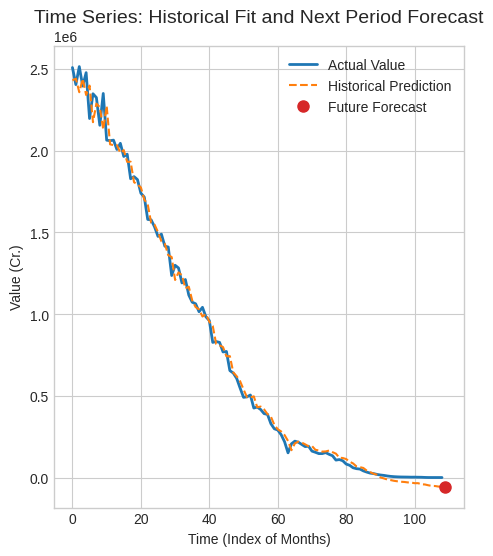

In [ ]:
 #--- Visualization (The Charts) ---

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(18, 6))

# 1. Actual vs. Predicted Time Series Line Chart (Including Future Forecast)
plt.subplot(1, 3, 1)
sns.lineplot(x='Month_Index', y='Actual Value (Cr.)', data=valuable_dataset, label='Actual Value', color='#1f77b4', linewidth=2)
sns.lineplot(x='Month_Index', y='Predicted_Value', data=valuable_dataset, label='Historical Prediction', color='#ff7f0e', linestyle='--', linewidth=1.5)

# Add the future prediction point
plt.plot(future_df['Month_Index'], future_df['Predicted_Value'],
         marker='o', markersize=8, color='#d62728',
         linestyle='', label='Future Forecast')

# Optionally draw a dashed line connecting the last historical prediction to the future one
last_index = future_index - 1
last_pred = valuable_dataset['Predicted_Value'].iloc[-1]
plt.plot([last_index, future_index], [last_pred, next_period_prediction],
         color='#d62728', linestyle=':', linewidth=1.5)


plt.title('Time Series: Historical Fit and Next Period Forecast', fontsize=14)
plt.xlabel('Time (Index of Months)', fontsize=10)
plt.ylabel('Value (Cr.)', fontsize=10)
plt.legend()

Text(0, 0.5, 'Frequency')

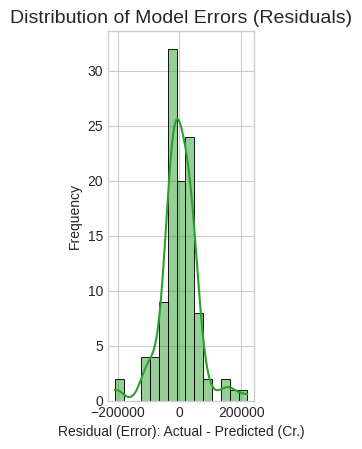

In [ ]:
 #2. Residuals Histogram
plt.subplot(1, 3, 2)
sns.histplot(valuable_dataset['Residual (Error)'], bins=15, kde=True, color='#2ca02c')
plt.title('Distribution of Model Errors (Residuals)', fontsize=14)
plt.xlabel('Residual (Error): Actual - Predicted (Cr.)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)


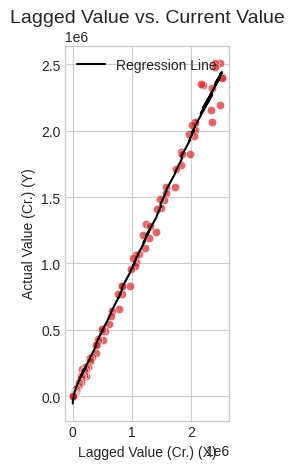

In [ ]:
# 3. Lagged Value vs. Actual Value Scatter Plot (The Core Relationship)
plt.subplot(1, 3, 3)
sns.scatterplot(x='Lagged Value (Cr.)', y='Actual Value (Cr.)', data=valuable_dataset, color='#d62728', alpha=0.7)
plt.plot(valuable_dataset['Lagged Value (Cr.)'], valuable_dataset['Predicted_Value'], color='black', linestyle='-', label='Regression Line')
plt.title('Lagged Value vs. Current Value', fontsize=14)
plt.xlabel('Lagged Value (Cr.) (X)', fontsize=10)
plt.ylabel('Actual Value (Cr.) (Y)', fontsize=10)
plt.legend()


plt.tight_layout()
plt.show()

In [ ]:
# --- Display Text Results (Original Output for Reference) ---
print("-" * 70)
print(f"VALUABLE DATASET: MODEL PERFORMANCE ANALYSIS")
print(f"R-squared Score: {model.score(X, y):.4f}")
print(f"Forecasted Value for Next Period: {next_period_prediction:.2f} Cr.")
print("-" * 70)


----------------------------------------------------------------------
VALUABLE DATASET: MODEL PERFORMANCE ANALYSIS
R-squared Score: 0.9948
Forecasted Value for Next Period: -55358.70 Cr.
----------------------------------------------------------------------
